In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataCapres/anies.csv')
df.head()

,Unnamed: 0,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,0,Fri Dec 15 04:04:44 +0000 2023,1.735511e+18,"@dedy_pram Pastilah, Prabowo Anies nggak punya...",0.0,0,0.0,0.0,in,797761417894051840,1.735147e+18,MarahIchsan,https://twitter.com/MarahIchsan/status/1735511...
1,1,Fri Dec 15 04:04:33 +0000 2023,1.735511e+18,Suasana pedesaan memang selalu menyenangkan......,0.0,0,0.0,0.0,in,936445409605459968,1.735511e+18,Agung_wiyo,https://twitter.com/Agung_wiyo/status/17355111...
2,2,Fri Dec 15 04:04:31 +0000 2023,1.735511e+18,Program anies hanyalah mengubah nama rumah sak...,0.0,0,0.0,0.0,in,768652236,1.735511e+18,Alfakton_i,https://twitter.com/Alfakton_i/status/17355111...
3,3,Fri Dec 15 04:04:27 +0000 2023,1.735511e+18,@kumparan @aniesbaswedan anies... BERBOHONG DA...,0.0,0,0.0,0.0,in,1710823909275410432,1.735146e+18,justtheway333,https://twitter.com/justtheway333/status/17355...
4,4,Fri Dec 15 04:04:26 +0000 2023,1.735511e+18,Tidak Bicara Sesuai Fakta! Anies Dengan Lantan...,0.0,0,1.0,1.0,in,1661757337554784264,1.735511e+18,singgihabdrchmn,https://twitter.com/singgihabdrchmn/status/173...


In [3]:
df = df[['full_text', 'username', 'created_at']] # mengambil kolom full_text, username, dan created_at
df # menampilkan dataframe

,full_text,username,created_at
0,"@dedy_pram Pastilah, Prabowo Anies nggak punya...",MarahIchsan,Fri Dec 15 04:04:44 +0000 2023
1,Suasana pedesaan memang selalu menyenangkan......,Agung_wiyo,Fri Dec 15 04:04:33 +0000 2023
2,Program anies hanyalah mengubah nama rumah sak...,Alfakton_i,Fri Dec 15 04:04:31 +0000 2023
3,@kumparan @aniesbaswedan anies... BERBOHONG DA...,justtheway333,Fri Dec 15 04:04:27 +0000 2023
4,Tidak Bicara Sesuai Fakta! Anies Dengan Lantan...,singgihabdrchmn,Fri Dec 15 04:04:26 +0000 2023
...,...,...,...
510,Tiga untuk Indonesia lebih baik . tag || Gac...,TugimanPresiden,Fri Dec 15 03:36:13 +0000 2023
511,@herculep638 Makanya susah memahami apa yg dis...,Pribumituan,Fri Dec 15 03:36:13 +0000 2023
512,"Buat Pak Anies ,bukankah anda saat itu yg KD G...",Kacaback678910,Fri Dec 15 03:36:12 +0000 2023
513,"Anies Baswedan, sosok pemimpin yang memahami b...",YKasmono4,Fri Dec 15 03:36:12 +0000 2023


## 1. Cleaning Data


In [4]:
# kegunaannya untuk mengetahui jumlah baris dan kolom dari dataframe
df.shape 

(515, 3)

In [5]:
# menghapus data duplikat berdasarkan kolom full_text
df = df.drop_duplicates(subset=['full_text'])

In [6]:
# mengecek apakah masih ada data duplikat
df.duplicated().sum()

0

In [7]:
# menghapus baris yang memiliki nilai NaN atau null
df = df.dropna()

In [8]:
# mengecek apakah masih ada nilai NaN atau null
df.isnull().sum()

full_text     0
username      0
created_at    0
dtype: int64

In [9]:
# mengecek apakah ada perubahan jumlah baris
df.shape

(508, 3)

In [10]:
# pembuatan function untuk melakukan pembersihan
def clean_twitter_texr(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#\w+', '', text) # menghapus hastag
    text = re.sub(r'RT[\s]+', '', text) # menghapus retweet
    text = re.sub(r'https?://\S+', '', text) # menghapus url/link

    text = re.sub(r'[^A-Za-z0-9]+', ' ', text) # menghapus simbol (non-alfanumerik)
    text = re.sub(r'\s+', ' ', text).strip() # menghapus spasi yang berlebihan

    return text

# menerapkan function untuk pembersihan teks
df['full_text'] = df['full_text'].apply(clean_twitter_texr)

In [11]:
# mengubah teks menjadi huruf kecil
df['full_text'] = df['full_text'].str.lower() 

In [12]:
# mengecek apakah ada perubahan
df

,full_text,username,created_at
0,pram pastilah prabowo anies nggak punya prestasi,MarahIchsan,Fri Dec 15 04:04:44 +0000 2023
1,suasana pedesaan memang selalu menyenangkan ud...,Agung_wiyo,Fri Dec 15 04:04:33 +0000 2023
2,program anies hanyalah mengubah nama rumah sak...,Alfakton_i,Fri Dec 15 04:04:31 +0000 2023
3,anies berbohong dan nipu tanpa rasa bersalah,justtheway333,Fri Dec 15 04:04:27 +0000 2023
4,tidak bicara sesuai fakta anies dengan lantang...,singgihabdrchmn,Fri Dec 15 04:04:26 +0000 2023
...,...,...,...
510,tiga untuk indonesia lebih baik tag gacoan dae...,TugimanPresiden,Fri Dec 15 03:36:13 +0000 2023
511,makanya susah memahami apa yg disampaikam anie...,Pribumituan,Fri Dec 15 03:36:13 +0000 2023
512,buat pak anies bukankah anda saat itu yg kd gu...,Kacaback678910,Fri Dec 15 03:36:12 +0000 2023
513,anies baswedan sosok pemimpin yang memahami ba...,YKasmono4,Fri Dec 15 03:36:12 +0000 2023


   ## 2. Preprocessing
   - Normalisasi
   - Stopword
   - Tokenize
   - Stemming



In [13]:
# Normalisasi

# ini adalah proses mengganti kata yang salah dengan kata yang benar
# karena ini adalah bagian data anies, maka kita juga akan menghapus jika ada nama prabowo atau ganjar
# norm adalah dictionary yang berisi kata yang salah dan kata yang benar
norm = {" yg " : " yang ", 
        " ganjar " : " ", 
        " prabowo " : " ", 
        "pram " : " ", 
        " ngga " : " tidak ", 
        " nggak " : " tidak ", 
        " ga " : " tidak ", 
        " gak " : " tidak ", 
        " vibes " : " suasana ", 
        " text " : " teks ", 
        " mantab " : " keren ", 
        " end " : " selesai ", 
        " kelen " : " kalian ", 
        " jd " : " jadi ", 
        " tuk " : " untuk ", 
        " bangetdari " : " banget dari ", 
        " disampaikam " : " disampaikan ", 
        " kk " : " kakak "}

# membuat function normalisasi 
def normalisasi(str_text):
    # perulangan ini bertujuan untuk mengganti kata yang salah dengan kata yang benar diatas
    for i in norm:
        str_text = str_text.replace(i, norm[i])
    return str_text

# menerapkan function
df['full_text'] = df['full_text'].apply(lambda x: normalisasi(x))

# mengecek apakah ada perubahan
df

,full_text,username,created_at
0,pastilah anies tidak punya prestasi,MarahIchsan,Fri Dec 15 04:04:44 +0000 2023
1,suasana pedesaan memang selalu menyenangkan ud...,Agung_wiyo,Fri Dec 15 04:04:33 +0000 2023
2,program anies hanyalah mengubah nama rumah sak...,Alfakton_i,Fri Dec 15 04:04:31 +0000 2023
3,anies berbohong dan nipu tanpa rasa bersalah,justtheway333,Fri Dec 15 04:04:27 +0000 2023
4,tidak bicara sesuai fakta anies dengan lantang...,singgihabdrchmn,Fri Dec 15 04:04:26 +0000 2023
...,...,...,...
510,tiga untuk indonesia lebih baik tag gacoan dae...,TugimanPresiden,Fri Dec 15 03:36:13 +0000 2023
511,makanya susah memahami apa yang disampaikan an...,Pribumituan,Fri Dec 15 03:36:13 +0000 2023
512,buat pak anies bukankah anda saat itu yang kd ...,Kacaback678910,Fri Dec 15 03:36:12 +0000 2023
513,anies baswedan sosok pemimpin yang memahami ba...,YKasmono4,Fri Dec 15 03:36:12 +0000 2023


In [14]:
# %pip install Sastrawi

In [15]:
# Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

# ini akan membuang kata kata yang tidak memiliki bobot, contohnya kata di, yang, dengan, dan lain lain
# disini saya tambahkan kata "tidak", karena saya merasa ini juga tidak memiliki bobot
more_stop_words = ["tidak"]

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
    str_text = stop_words_remover_new.remove(str_text)
    return str_text

df['full_text'] = df['full_text'].apply(lambda X: stopword(X))
df.head()

,full_text,username,created_at
0,pastilah anies punya prestasi,MarahIchsan,Fri Dec 15 04:04:44 +0000 2023
1,suasana pedesaan memang selalu menyenangkan ud...,Agung_wiyo,Fri Dec 15 04:04:33 +0000 2023
2,program anies hanyalah mengubah nama rumah sak...,Alfakton_i,Fri Dec 15 04:04:31 +0000 2023
3,anies berbohong nipu rasa bersalah,justtheway333,Fri Dec 15 04:04:27 +0000 2023
4,bicara sesuai fakta anies lantang sebut lampun...,singgihabdrchmn,Fri Dec 15 04:04:26 +0000 2023


In [16]:
# Tokenize

# kegunaan tokenize ini adalah untuk memecah teks menjadi kata-kata
tokenized = df['full_text'].apply(lambda x:x.split())
tokenized

0                     [pastilah, anies, punya, prestasi]
1      [suasana, pedesaan, memang, selalu, menyenangk...
2      [program, anies, hanyalah, mengubah, nama, rum...
3               [anies, berbohong, nipu, rasa, bersalah]
4      [bicara, sesuai, fakta, anies, lantang, sebut,...
                             ...                        
510    [tiga, indonesia, lebih, baik, tag, gacoan, da...
511    [makanya, susah, memahami, apa, disampaikan, a...
512    [buat, pak, anies, bukankah, saat, kd, gubernu...
513    [anies, baswedan, sosok, pemimpin, memahami, k...
514    [anies, baswedan, diharapkan, membawa, perubah...
Name: full_text, Length: 508, dtype: object

In [17]:
# Stemming

# # fungsinya untuk mengubah kata yang tadinya memiliki imbuhan menjadi kata dasar
# # contoh : menipu menjadi tipu

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# def stemming(text_cleaning):
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     do = []
#     for w in text_cleaning:
#         dt = stemmer.stem(w)
#         do.append(dt)
#     d_clean = []
#     d_clean = ' '.join(do)
#     print(d_clean)
#     return d_clean

# tokenized = tokenized.apply(stemming)

# # karena proses ini lama, kita akan ngebackup data ke dalam csv, agar kedepannya tidak perlu melakukan proses ini lagi
# # menyimpan data ke dalam csv 

# tokenized.to_csv('dataPreprocessing/PreprocessingAnies.csv', index=False)


## 3. Translate

In [18]:
# %pip install translate

In [19]:
# memasukkan data hasil stemming ke dalam dataframe
data = pd.read_csv('dataPreprocessing/PreprocessingAnies.csv', encoding='latin-1')
data.head()

#kenapa atributnya cuma 1 yaitu full_text? karena untuk proses pengolahan labeling ataupun analisis datanya kita hanya memerlukan atribut komentar dari masyarakat yaitu full_text

,full_text
0,pasti anies punya prestasi
1,suasana desa memang selalu senang udara segar ...
2,program anies hanya ubah nama rumah sakit se i...
3,anies bohong nipu rasa salah
4,bicara sesuai fakta anies lantang sebut lampun...


In [20]:
# from translate import Translator

# # fungsi ini berguna untuk mengubah teks dari bahasa indonesia menjadi bahasa inggris
# def convert_eng(tweet):
#     translator = Translator(to_lang="en", from_lang="id")
#     translation = translator.translate(tweet)
#     return translation

# # bagian mengapply fungsi di atas ke dalam data
# data['tweet_english'] = data['full_text'].apply(convert_eng)

# # menyimpan/backup data ke dalam csv, karena proses ini lumayan lama, jadi kedepannya agar tidak perlu running bagian ini lagi
# data.to_csv('dataTerjemahan/TerjemahanAnies.csv', index=False)

## 4. Labeling

In [21]:
# memasukkan data hasil terjemahan ke dalam dataframe
data = pd.read_csv('dataTerjemahan/TerjemahanAnies.csv')
data

,full_text,tweet_english
0,pasti anies punya prestasi,anies must have achievements
1,suasana desa memang selalu senang udara segar ...,village atmosphere is always happy lush fresh ...
2,program anies hanya ubah nama rumah sakit se i...,anies program only change the name of the hosp...
3,anies bohong nipu rasa salah,anies lie nipu rasa salah
4,bicara sesuai fakta anies lantang sebut lampun...,speak according to the fact anies loudly say L...
...,...,...
503,tiga indonesia lebih baik tag gaco daesang oli...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...
504,makanya susah paham apa sampai anies baswedan,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...
505,buat pak anies bukankah saat kd gubernur dki a...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...
506,anies baswedan sosok pimpin paham pimpin bukan...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...


In [22]:
# %pip install tweet-preprocessor
# %pip install textblob
# %pip install wordcloud
# %pip install nltk

In [23]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
# nltk.download('all')


[nltk_data] Downloading package punkt to C:\Users\LEGION SLIM
[nltk_data]     7/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
data_tweet = list(data['tweet_english'])
polaritas = 0

status = [] # untuk melihat status sentimen
total_positif = total_negatif = total_netral = total = 0

# proses labeling
for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet)
    polaritas = analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append('Positif')
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append('Netral')
    else:
        total_negatif += 1
        status.append('Negatif')

    total += 1

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data: {total}')

Hasil Analisis Data:
Positif = 454
Netral = 38
Negatif = 16

Total Data: 508


In [25]:
data['klasifikasi'] = status
data

,full_text,tweet_english,klasifikasi
0,pasti anies punya prestasi,anies must have achievements,Netral
1,suasana desa memang selalu senang udara segar ...,village atmosphere is always happy lush fresh ...,Positif
2,program anies hanya ubah nama rumah sakit se i...,anies program only change the name of the hosp...,Netral
3,anies bohong nipu rasa salah,anies lie nipu rasa salah,Netral
4,bicara sesuai fakta anies lantang sebut lampun...,speak according to the fact anies loudly say L...,Positif
...,...,...,...
503,tiga indonesia lebih baik tag gaco daesang oli...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif
504,makanya susah paham apa sampai anies baswedan,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif
505,buat pak anies bukankah saat kd gubernur dki a...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif
506,anies baswedan sosok pimpin paham pimpin bukan...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif


## 5. Visualisasi

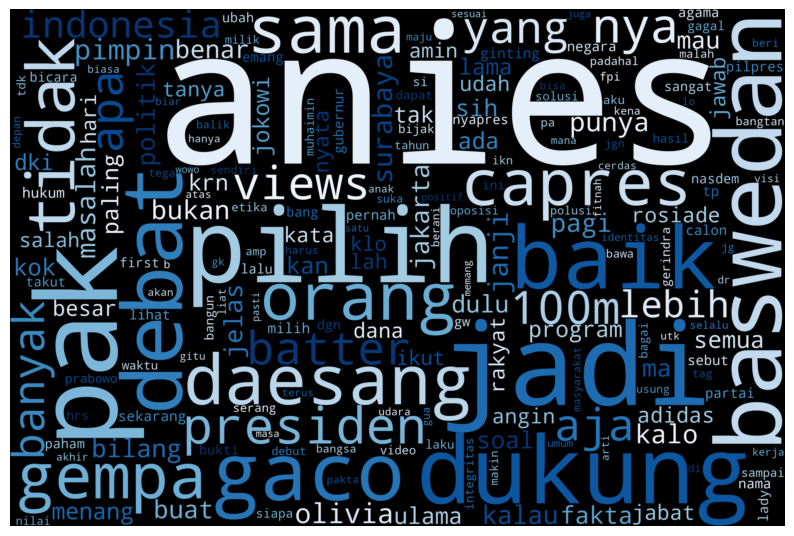

In [26]:
from wordcloud import WordCloud, STOPWORDS

# kita akan menampilkan visualisasi workcloud atau menampilkan beberapa data yang memiliki kuantitas yang tinggi
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

all_words = ' '.join([tweet for tweet in data['full_text']])

wordcloud = WordCloud(
    width=3000, 
    height=2000, 
    random_state=3, 
    background_color='black', 
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)

plot_cloud(wordcloud)

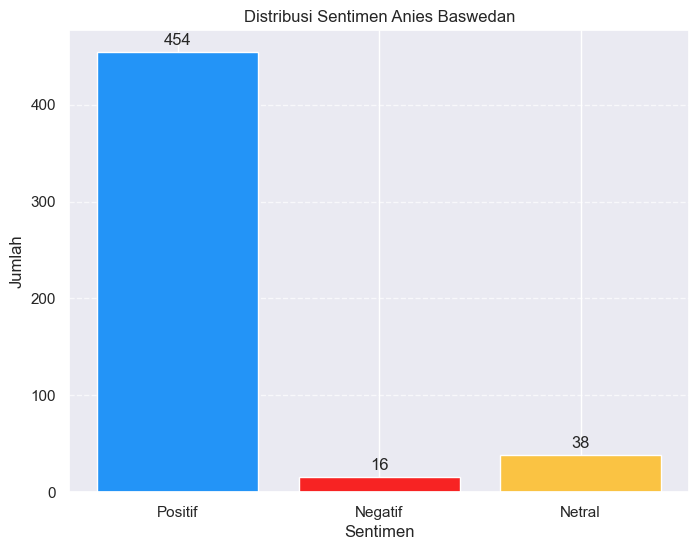

In [27]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Anies Baswedan")

## 6. Klasifikasi Sentimen

In [28]:
data

,full_text,tweet_english,klasifikasi
0,pasti anies punya prestasi,anies must have achievements,Netral
1,suasana desa memang selalu senang udara segar ...,village atmosphere is always happy lush fresh ...,Positif
2,program anies hanya ubah nama rumah sakit se i...,anies program only change the name of the hosp...,Netral
3,anies bohong nipu rasa salah,anies lie nipu rasa salah,Netral
4,bicara sesuai fakta anies lantang sebut lampun...,speak according to the fact anies loudly say L...,Positif
...,...,...,...
503,tiga indonesia lebih baik tag gaco daesang oli...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif
504,makanya susah paham apa sampai anies baswedan,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif
505,buat pak anies bukankah saat kd gubernur dki a...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif
506,anies baswedan sosok pimpin paham pimpin bukan...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif


In [29]:
dataset = data.drop('full_text', axis=1, inplace=False)
dataset = [tuple(x) for x in dataset.to_records(index=False)]

In [30]:
import random

# inisialisasi sentiment
set_positif = []
set_negatif = []
set_neutral = []

# membagi data menjadi 3 bagian
# jika sentimennya positif, maka akan masuk ke set_positif, dan seterusnya
for n in dataset:
    if n[1] == 'Positif':
        set_positif.append(n)
    elif n[1] == 'Negatif':
        set_negatif.append(n)
    else:
        set_neutral.append(n)

# membagi data menjadi 2 bagian
set_positif = random.sample(set_positif, k=int(len(set_positif) / 2))
set_negatif = random.sample(set_negatif, k=int(len(set_negatif) / 2))
set_neutral = random.sample(set_neutral, k=int(len(set_neutral) / 2))

# menggabungkan set_positif, set_negatif, dan set_neutral, dan menyimpannya pada variabel train
train = set_positif + set_negatif + set_neutral

train_set = []

for n in train:
    train_set.append(n)

In [31]:
# from nltk.classify import NaiveBayesClassifier
# from nltk.classify import accuracy

# # Format data menjadi format yang sesuai untuk classifier nltk
# train_data = [(dict([(word, True) for word in doc.split()]), category) for doc, category in train_set]

# # Melatih model
# classifier = NaiveBayesClassifier.train(train_data)

# # Menghitung akurasi
# test_data = [(dict([(word, True) for word in doc.split()]), category) for doc, category in dataset]
# print("Akurasi Test: ", accuracy(classifier, test_data))


In [32]:
# import os
# import nltk

# # Ensure we have a clean, writable download path
# nltk_data_path = os.path.join(os.path.expanduser('~'), 'nltk_data')
# os.makedirs(nltk_data_path, exist_ok=True)

# # Explicitly set the data path
# nltk.data.path = [nltk_data_path]

# # Download multiple related NLTK resources
# nltk.download('punkt')
# nltk.download('punkt_tab')
# nltk.download('averaged_perceptron_tagger')

# # Verify downloads
# try:
#     # Force a download with a specific download directory
#     nltk.download('punkt', download_dir=nltk_data_path)
#     nltk.download('punkt_tab', download_dir=nltk_data_path)
    
#     # List available packages
#     print("Available NLTK data:")
#     for package in nltk.corpus.corpora.fileids():
#         print(package)
# except Exception as e:
#     print(f"Download error: {e}")

# # Try tokenization
# try:
#     from nltk.tokenize import sent_tokenize
    
#     text = "Hello world. This is a test sentence."
#     sentences = sent_tokenize(text)
#     print("\nTokenized sentences:", sentences)
# except Exception as e:
#     print(f"\nTokenization error: {e}")

In [33]:
from textblob.classifiers import NaiveBayesClassifier

cl = NaiveBayesClassifier(train_set)
print("Akurasi Test: ", cl.accuracy(dataset))

Akurasi Test:  0.8070866141732284


In [34]:
# Labeling
data_tweet = list(data['tweet_english'])
polaritas = []
status = []
total_positif = total_negatif = total_neutral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet, classifier=cl)
    
    if analysis.classify() == 'Positif':
        total_positif += 1
    elif analysis.classify() == 'Neutral':
        total_neutral += 1
    else:
        total_negatif += 1

    status.append(analysis.classify())
    total += 1

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNeutral = {total_neutral}\nNegatif = {total_negatif}')

Hasil Analisis Data:
Positif = 367
Neutral = 0
Negatif = 141


In [35]:
status = pd.DataFrame({"Klasifikasi Bayes": status})
data['klasifikasi_bayes'] = status

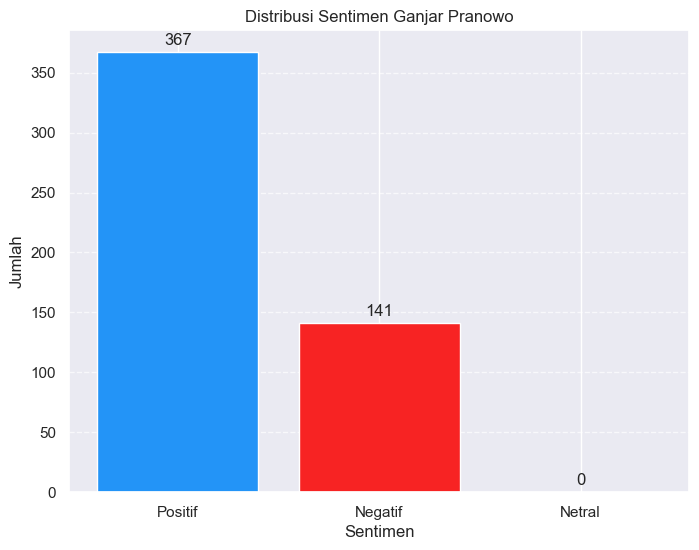

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set tema seaborn untuk tampilan yang lebih profesional
sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_neutral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    # Menambahkan keterangan presentase
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

    # Menambahkan grid
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Menambahkan label sumbu dan judul
    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ganjar Pranowo")


In [37]:
data

,full_text,tweet_english,klasifikasi,klasifikasi_bayes
0,pasti anies punya prestasi,anies must have achievements,Netral,Netral
1,suasana desa memang selalu senang udara segar ...,village atmosphere is always happy lush fresh ...,Positif,Netral
2,program anies hanya ubah nama rumah sakit se i...,anies program only change the name of the hosp...,Netral,Netral
3,anies bohong nipu rasa salah,anies lie nipu rasa salah,Netral,Netral
4,bicara sesuai fakta anies lantang sebut lampun...,speak according to the fact anies loudly say L...,Positif,Netral
...,...,...,...,...
503,tiga indonesia lebih baik tag gaco daesang oli...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif,Positif
504,makanya susah paham apa sampai anies baswedan,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif,Positif
505,buat pak anies bukankah saat kd gubernur dki a...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif,Positif
506,anies baswedan sosok pimpin paham pimpin bukan...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif,Positif


In [38]:
data_eval = [tuple(x) for x in data.to_records(index=False)]

for n in data_eval:
    if len(n) >= 4:
        if n[2] == n[3]:
            print(f'Text: {n[0]}\nClassifier: {n[2]}\nClassifier Bayes: {n[3]}\n')
    else:
        print("Tuple tidak memiliki cukup elemen.")


Text: pasti anies punya prestasi
Classifier: Netral
Classifier Bayes: Netral

Text: program anies hanya ubah nama rumah sakit se indonesia wkwk jungkook is coming olivia gaco daesang bangtan debut karina wonbin batter up 100m views
Classifier: Netral
Classifier Bayes: Netral

Text: anies bohong nipu rasa salah
Classifier: Netral
Classifier Bayes: Netral

Text: bravo b anak anies cakep bener anak capres muka tengil
Classifier: Netral
Classifier Bayes: Netral

Text: partai dukung pak anies tdk tahan jadi oposisi nasdem pkb tuh msh yang jabat tri imin msh jabat wakil ketua dprri nampaknya betah banget dgn kuasa mundur dong
Classifier: Netral
Classifier Bayes: Netral

Text: yang bilang anies modal kata doang pacar eco park tebet musuhin aja
Classifier: Netral
Classifier Bayes: Netral

Text: jsp anies pks
Classifier: Netral
Classifier Bayes: Netral

Text: gerindra bantah soal anies bilang bisnis macet gegara jadi oposisi
Classifier: Netral
Classifier Bayes: Netral

Text: is back anies ikut 